# GeoPandas example

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)


## Introduction

This notebook reads data from a survey where respondents provide the name and location (latitude and longitude) of their "home town".

If you are following the *Elements of Data Science* curriculum, you can read this notebook after doing the `02_times` notebook.  I'll use some features you have not seen yet, but you can get a preview of where we are headed.

The following cell reads the data into a Pandas DataFrame.

In [2]:
import pandas as pd

# To read data from a Google spreadsheet, open the sheet in Drive,
# Share, then "Get shareable link".  Copy the link and paste it into
# a Jupyter cell, then copy the `sheet_id`, which is a long string
# of letters and numbers in the middle of the URL, and paste it below.

# The following is the sheet ID for the survey
sheet_id = '1Xo144yGrM2TLSPlM9EhS3imGlWdL4YZccALDHYnGAYg'

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(url)
df.columns = ['Timestamp', 'Home town', 'latitude', 'longitude']
df

,Timestamp,Home town,latitude,longitude
0,1/14/2020 9:35:38,Luzern,47.050167,8.309307
1,1/14/2020 9:49:31,"Harrah, OK",35.489500,97.163600
2,1/19/2020 13:11:33,"Brussels, Belgium",50.845539,4.355710
3,1/23/2020 7:20:16,bristol,51.454514,-2.587910
4,1/23/2020 11:35:38,CABA (Buenos Aires City),-34.609032,-58.373219
5,1/23/2020 14:10:35,Botswana,-24.277012,22.053224
6,1/23/2020 14:28:10,"Santa Monica, CA",34.010929,-118.491508
7,1/23/2020 14:31:32,"Framingham, MA, USA",42.504990,-71.195830
8,1/23/2020 14:32:07,Gothenburg,57.696961,11.964948
9,1/23/2020 14:35:43,"Wilmington, MA",42.558281,-71.163834


## GeoPandas

The following cell installs GeoPandas, which we'll use to visualize the results.

In [3]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install geopandas

Now the following import statements should work.

In [4]:
import geopandas as gpd

The following code loads a map of the world and plots it.

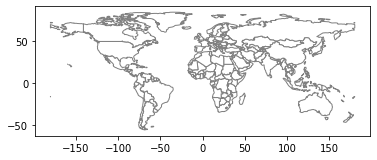

In [6]:
%matplotlib inline

path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world.to_crs(epsg=3395)

world.plot(color='white', edgecolor='gray');

## Making the map

We'll use `Point` and `LineString` to plot locations and lines.

In [7]:
from shapely.geometry import Point, LineString

Here's a point that represents the location of Boston.  Notice that when you create a `Point`, the order of latitude and longitude is non-standard.

In [8]:
lat = 42.3601
lon = -71.0589
boston = Point(lon, lat)

The following cell loops through the rows of the DataFrame and creates two GeoSeries: one contains a `Point` for each location, the other contains a `LineString` for each location.

In [9]:
lines = gpd.GeoSeries()
points = gpd.GeoSeries()
points['boston'] = boston

for i, row in df.iterrows():
    timestamp, name, lat, lon = row
    print(name, lat, lon)
    hometown = Point(lon, lat)
    points[name] = hometown
    lines[name] = LineString([hometown, boston])

Luzern 47.050167 8.309307
Harrah, OK 35.4895 97.1636
Brussels, Belgium 50.845539 4.35571
bristol 51.454514 -2.58791
CABA (Buenos Aires City) -34.609032 -58.37321899999999
Botswana -24.277012 22.053224
Santa Monica, CA 34.010929 -118.49150800000001
Framingham, MA, USA 42.50499 -71.19583
Gothenburg 57.696961 11.964948
Wilmington, MA 42.558281 -71.163834
Modest, CA 37.639095000000005 -120.99688
Tacoma, WA 47.252876 -122.44429
Dracut, MA 42.668941 -71.303299
Freehold, NJ 40.2137 -74.3001
Madison, WI 43.0731 -89.4012


Now we can plot the world map, the home towns, and the lines.

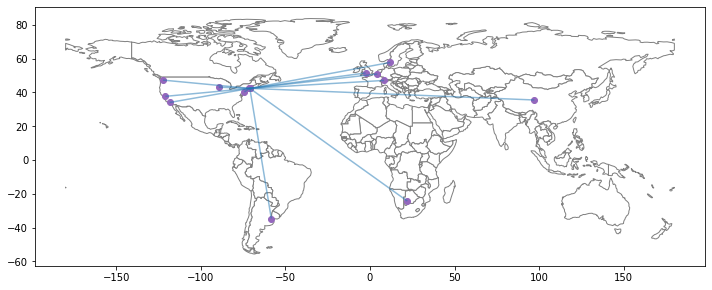

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
ax = plt.gca()

# plot the map
world.plot(color='white', edgecolor='gray', ax=ax)

# plot the lines
lines.plot(color='C0', alpha=0.5, ax=ax)

# plot the points
points.plot(color='C4', ax=ax);